Q1) Linear Separability (Binary Classification)
Dataset: svm_linear.csv (200 rows, 2 features)


Task: Train an SVM with linear kernel to classify data into two classes.


Report accuracy and decision boundary.


   feature1  feature2  label
0  0.127071  1.013042      1
1  2.312935  3.770534      1
2  3.340428  3.420996      1
3  3.294548  0.595620      1
4  1.944105  1.477241      1
Accuracy: 0.975


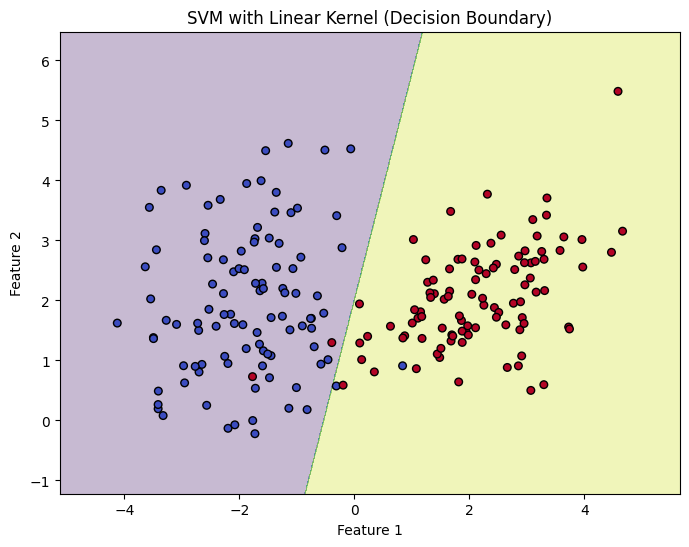

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

df=pd.read_csv("C:/Users/varsh/Downloads/svm_linear.csv")  # Make sure this file is in the same folder
print(df.head())

X=df.iloc[:, :-1].values   # first 2 columns as features
y=df.iloc[:, -1].values    # last column as target

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model=SVC(kernel='linear')
model.fit(X_train, y_train)

# 5. Accuracy
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 6. Plot decision boundary
plt.figure(figsize=(8,6))

# Create mesh grid
x_min,x_max=X[:, 0].min() - 1, X[:, 0].max() + 1
y_min,y_max=X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on mesh grid
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM with Linear Kernel (Decision Boundary)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Q2) Effect of Kernel (Binary Classification)
Dataset: svm_kernel.csv (200 rows, circular pattern)


Task: Train SVM with linear kernel and SVM with RBF kernel. Compare performance.


Linear Kernel Accuracy: 0.575
RBF Kernel Accuracy: 1.0


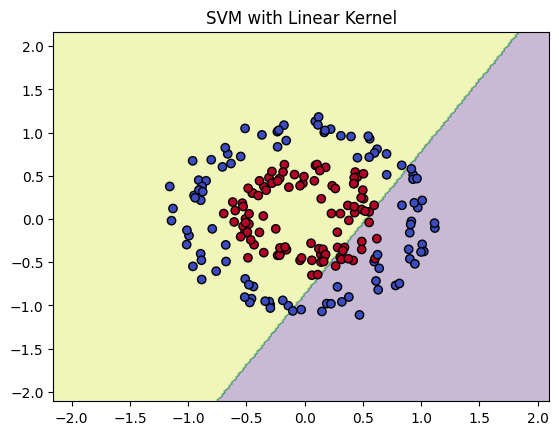

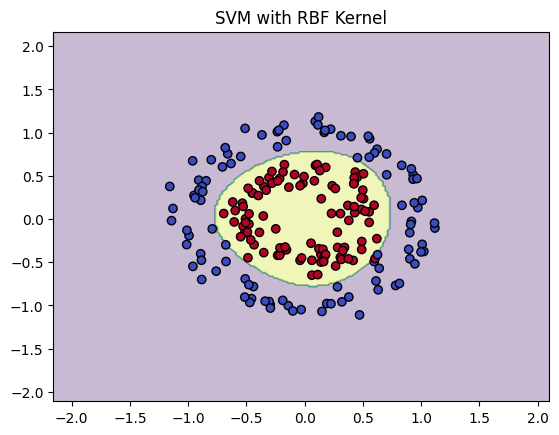

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
df = pd.read_csv("C:/Users/varsh/Downloads/svm_kernel.csv")   # 200 rows, circular pattern
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
linear = SVC(kernel='linear').fit(X_train, y_train)
rbf = SVC(kernel='rbf').fit(X_train, y_train)

# Accuracy
print("Linear Kernel Accuracy:", accuracy_score(y_test, linear.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, rbf.predict(X_test)))

# Plot function
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Plot results
plot_boundary(linear, X, y, "SVM with Linear Kernel")
plot_boundary(rbf, X, y, "SVM with RBF Kernel")


Q3) Multiclass Classification with SVM
Dataset: svm_multi.csv (3 classes, 2 features, 300 rows).


Task: Use SVM (RBF kernel) to classify data into 3 classes.


Report confusion matrix and accuracy


Accuracy: 1.0


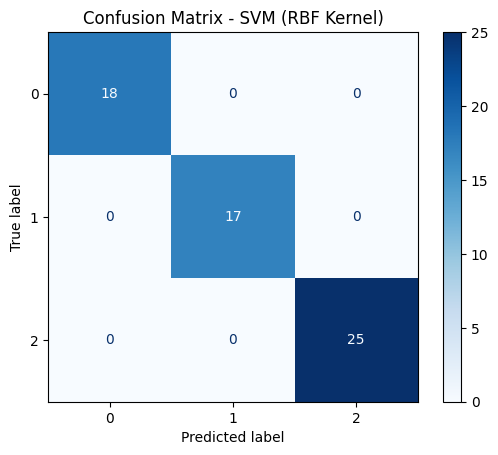

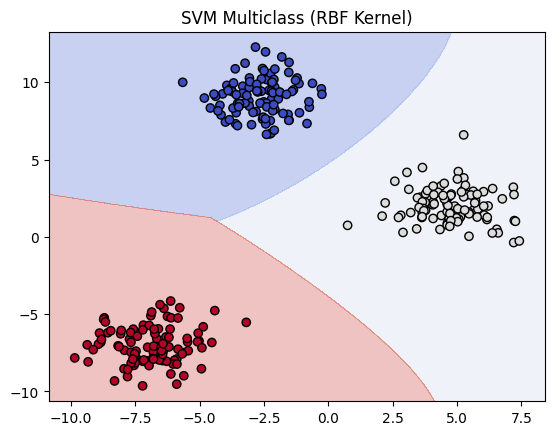

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("C:/Users/varsh/Downloads/svm_multi.csv")   # 300 rows, 3 classes
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM (RBF kernel)
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.show()

# Optional: Decision Boundary plot
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

plot_decision_boundary(model, X, y, "SVM Multiclass (RBF Kernel)")


Q4) Simple Classification Tree
Dataset: dt_class.csv (200 rows, 2 features + label).


Task: Train a Decision Tree Classifier.


Visualize the tree and report test accuracy.


Decision Tree Accuracy: 0.8


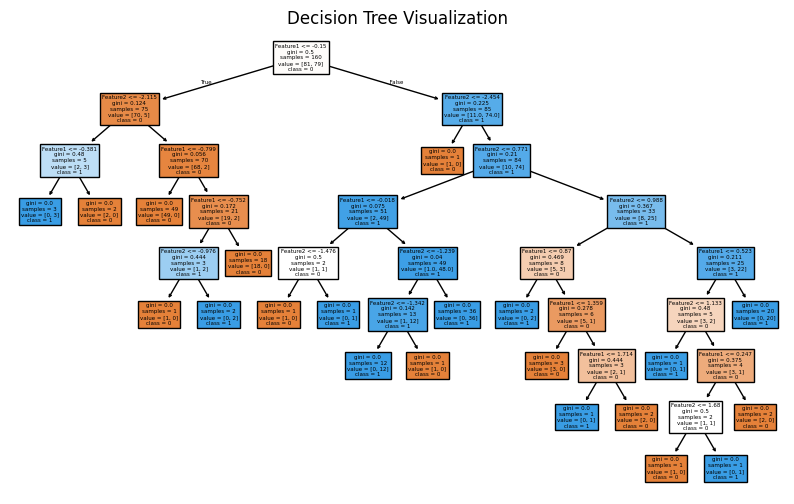

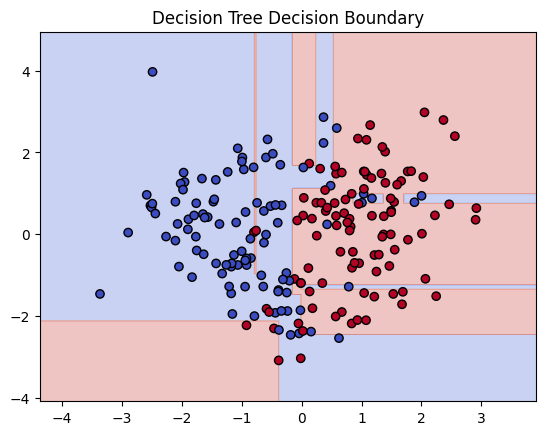

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("C:/Users/varsh/Downloads/dt_class.csv")   # 200 rows, 2 features + label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Test Accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc)

# Visualize the Decision Tree
plt.figure(figsize=(10,6))
plot_tree(model, filled=True, feature_names=["Feature1", "Feature2"], class_names=[str(c) for c in np.unique(y)])
plt.title("Decision Tree Visualization")
plt.show()

# Optional: Decision Boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

plot_decision_boundary(model, X, y, "Decision Tree Decision Boundary")


Q5) Effect of Tree Depth
Dataset: dt_depth.csv (200 rows, 2 features).


Task: Train Decision Tree with max_depth=2, 5, None. Compare train/test accuracy.


Max Depth=2: Train Accuracy=0.886, Test Accuracy=0.833


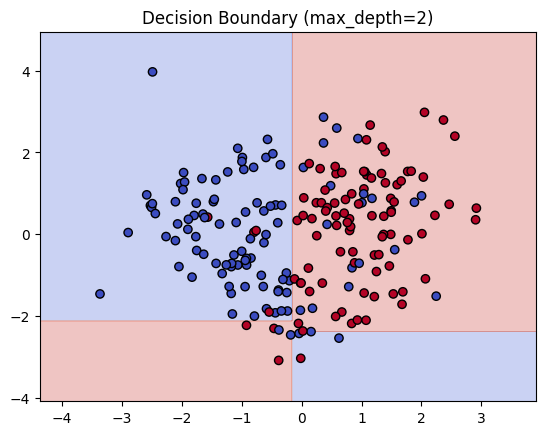

Max Depth=5: Train Accuracy=0.943, Test Accuracy=0.817


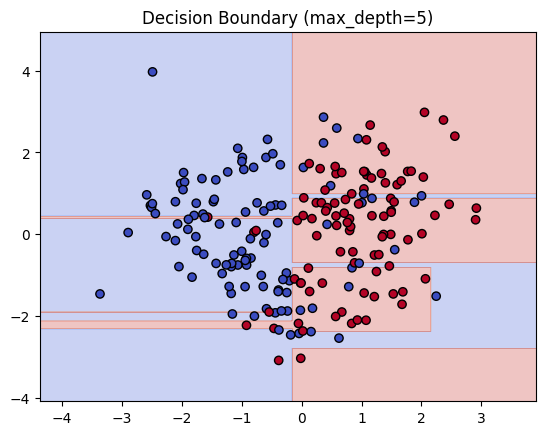

Max Depth=None: Train Accuracy=1.000, Test Accuracy=0.767


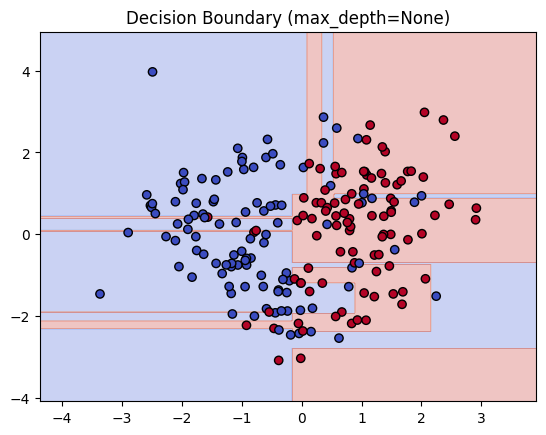

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("C:/Users/varsh/Downloads/dt_depth.csv")   # 200 rows, 2 features + label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train & evaluate
def evaluate_tree(max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    return model, train_acc, test_acc

# Try different depths
depths = [2, 5, None]
results = {}

for d in depths:
    model, train_acc, test_acc = evaluate_tree(d)
    results[d] = (train_acc, test_acc)
    print(f"Max Depth={d}: Train Accuracy={train_acc:.3f}, Test Accuracy={test_acc:.3f}")

    # Optional: Decision boundary
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary (max_depth={d})")
    plt.show()


Q6) Regression Tree
Dataset: dt_reg.csv (200 rows, x → y with some noise).


Task: Fit DecisionTreeRegressor to predict y.


Compare RMSE with depths 2, 5, None.


Max Depth=2: Train RMSE=27.671, Test RMSE=40.534
Max Depth=5: Train RMSE=11.712, Test RMSE=19.911
Max Depth=None: Train RMSE=0.000, Test RMSE=23.796


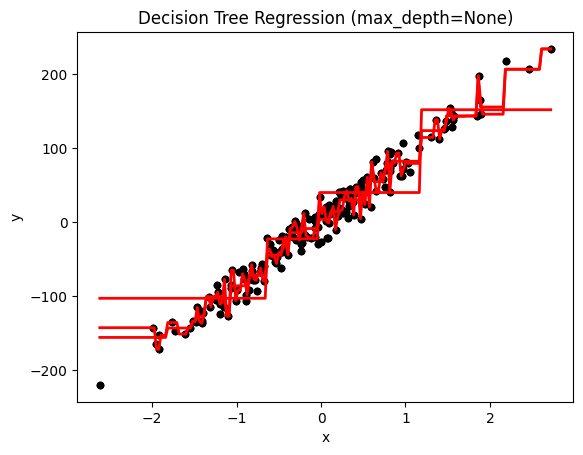

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("C:/Users/varsh/Downloads/dt_reg.csv")   # 200 rows, columns: x, y
X = df[["x"]].values
y = df["y"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train & evaluate
def evaluate_regression_tree(max_depth):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    return model, train_rmse, test_rmse

# Try depths
depths = [2, 5, None]
for d in depths:
    model, train_rmse, test_rmse = evaluate_regression_tree(d)
    print(f"Max Depth={d}: Train RMSE={train_rmse:.3f}, Test RMSE={test_rmse:.3f}")

    # Plot predictions
    X_grid = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    y_grid_pred = model.predict(X_grid)

    plt.scatter(X, y, s=20, c="black", label="Data")
    plt.plot(X_grid, y_grid_pred, color="red", linewidth=2, label=f"Tree (depth={d})")
    plt.title(f"Decision Tree Regression (max_depth={d})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend
